# PREDICTING STOCK PRICES FOR LARGE-CAPIAL TECHNOLOGY COMPANIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

C:\Users\anupa\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
data=pd.read_csv('C:/Users/anupa/Desktop/Technocolabs/Tesla_Max.csv')

In [3]:
data.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [4]:
np.random.seed(0)

In [5]:
data.head()

,Date,Close,Volume,Open,High,Low
0,07/21/2021,$655.29,13953340,$659.61,$664.8599,$650.2901
1,07/20/2021,$660.5,15487130,$651.99,$662.3916,$640.501
2,07/19/2021,$646.22,21297090,$629.89,$647.1999,$621.29
3,07/16/2021,$644.22,16370970,$654.68,$656.6999,$642.2
4,07/15/2021,$650.6,20209570,$658.39,$666.14,$637.88


In [6]:
data.shape

(2516, 6)

### MISSING VALUES

In [7]:
missing_values_count=data.isnull().sum()

In [8]:
missing_values_count[0:10]

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [9]:
total_cells=np.product(data.shape)
total_missing=missing_values_count.sum()

### MISSING DATA PERCENTAGE

In [10]:
percent_missing=(total_missing/total_cells)*100
print(percent_missing)

0.0


### SCALING

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SCALED DATA')

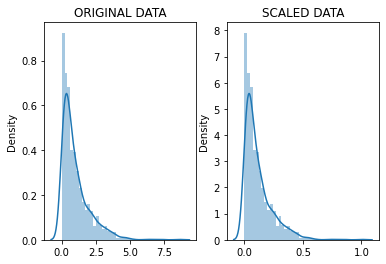

In [11]:
original_data=np.random.exponential(size=1000)
scaled_data=minmax_scaling(original_data,columns=[0])
fig,ax=plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("ORIGINAL DATA")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("SCALED DATA")

### NORMALIZATION

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'NORMALIZED DATA')

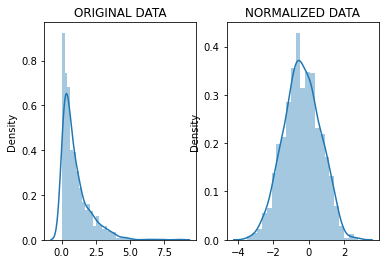

In [12]:
normalized_data=stats.boxcox(original_data)
fig,ax=plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("ORIGINAL DATA")
sns.distplot(normalized_data[0],ax=ax[1])
ax[1].set_title("NORMALIZED DATA")

### PARSING DATES

In [13]:
data['date_parsed']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data['date_parsed'].head()

0   2021-07-21
1   2021-07-20
2   2021-07-19
3   2021-07-16
4   2021-07-15
Name: date_parsed, dtype: datetime64[ns]

In [14]:
day_of_year_data=data['date_parsed'].dt.year
day_of_year_data.head(10)

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: date_parsed, dtype: int64

In [15]:
day_of_year_data.tail(10)

2506    2011
2507    2011
2508    2011
2509    2011
2510    2011
2511    2011
2512    2011
2513    2011
2514    2011
2515    2011
Name: date_parsed, dtype: int64

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

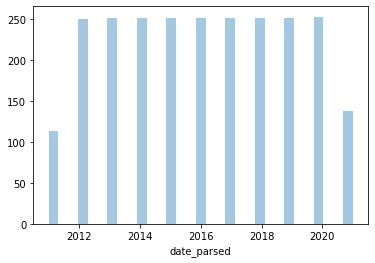

In [16]:
sns.distplot(day_of_year_data,kde=False,bins=31)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

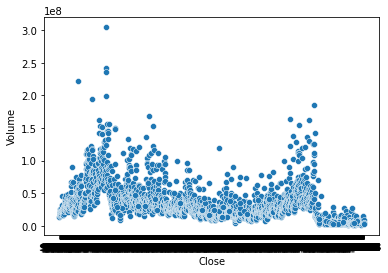

In [17]:
sns.scatterplot(x=data['Close'],y=data['Volume'])

### CLEANING THE DATA REPLACING $

In [18]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [23]:
data['Close'] = data['Close'].apply(clean_currency).astype('float')
data['Open'] = data['Open'].apply(clean_currency).astype('float')
data['High'] = data['High'].apply(clean_currency).astype('float')
data['Low'] = data['Low'].apply(clean_currency).astype('float')

In [24]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Close,Volume,Open,High,Low,date_parsed
0,2021-07-21,655.29,13953340,659.61,664.8599,650.2901,2021-07-21
1,2021-07-20,660.50,15487130,651.99,662.3916,640.5010,2021-07-20
2,2021-07-19,646.22,21297090,629.89,647.1999,621.2900,2021-07-19
3,2021-07-16,644.22,16370970,654.68,656.6999,642.2000,2021-07-16
4,2021-07-15,650.60,20209570,658.39,666.1400,637.8800,2021-07-15


### PLOTTING GRAPHS

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

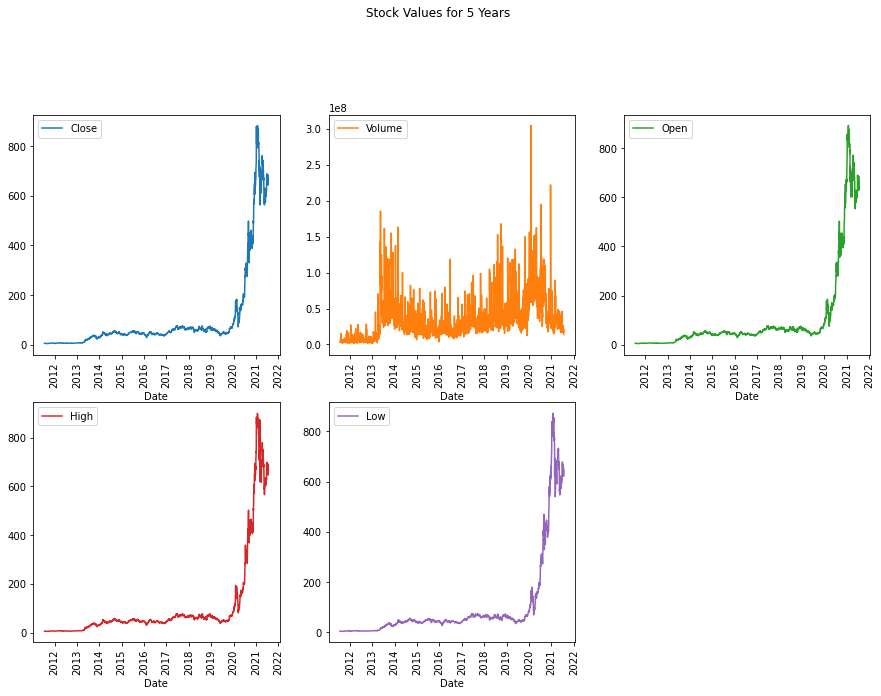

In [25]:
columns = ['Close', 'Volume', 'Open', 'High', 'Low']
data.plot(x='Date', y=columns, subplots=True, layout=(3, 3), sharex=False, 
figsize=(15, 15), title='Stock Values for 5 Years', rot=90)

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>, <AxesSubplot:>]],
      dtype=object)

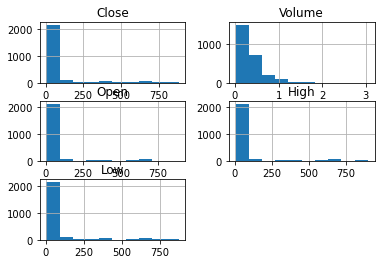

In [26]:
data[columns].hist()

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

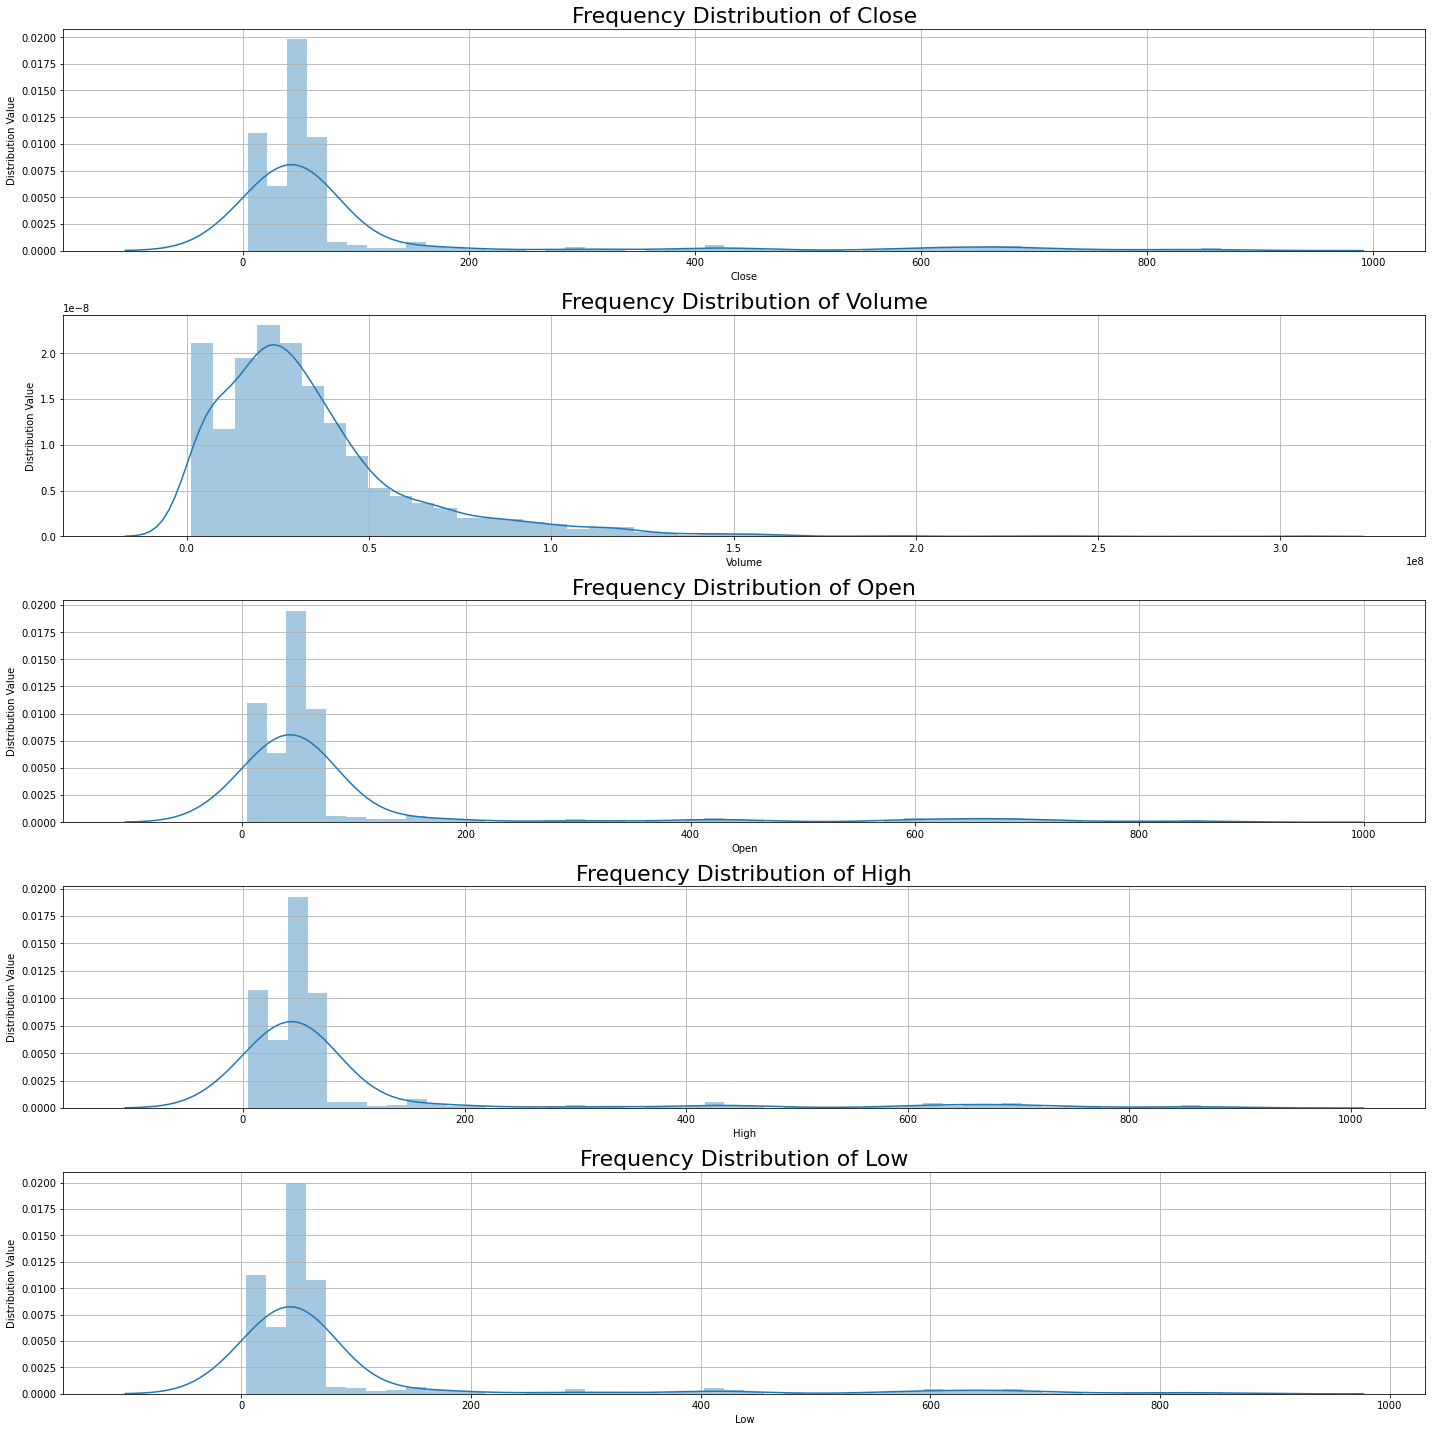

In [27]:
# Plotting Distribution Plot
fig, ax = plt.subplots(len(columns), figsize=(20, 20))
for i, c in enumerate(columns):
    sns.distplot(data[c], hist=True, ax=ax[i])
    ax[i].set_title("Frequency Distribution of" + " " + c, fontsize=22)
    ax[i].set_xlabel(c)
    ax[i].set_ylabel('Distribution Value')
    fig.tight_layout(pad=1.1)
    ax[i].grid('on')

<AxesSubplot:>

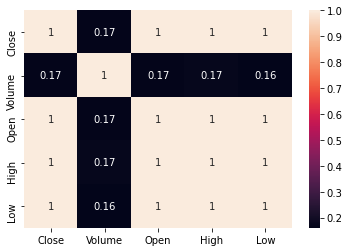

In [28]:
corelation = data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [29]:
corelation

,Close,Volume,Open,High,Low
Close,1.000000,0.167046,0.999294,0.999251,0.999616
Volume,0.167046,1.000000,0.165816,0.171154,0.160551
Open,0.999294,0.165816,1.000000,0.999281,0.999636
High,0.999251,0.171154,0.999281,1.000000,0.999048
Low,0.999616,0.160551,0.999636,0.999048,1.000000


<AxesSubplot:xlabel='Close', ylabel='Open'>

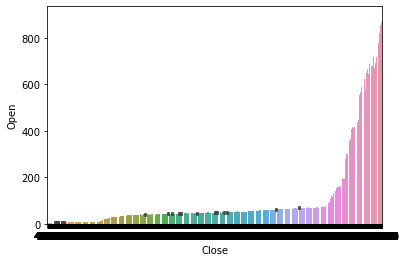

In [30]:
sns.barplot(x=data['Close'],y=data['Open'])

<AxesSubplot:xlabel='Close', ylabel='Volume'>

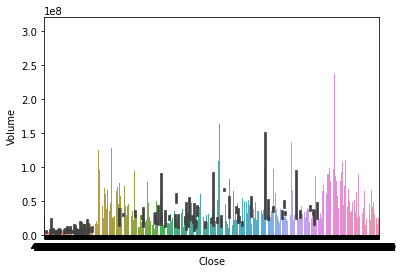

In [31]:
sns.barplot(x=data['Close'],y=data['Volume'])

<AxesSubplot:xlabel='Close', ylabel='High'>

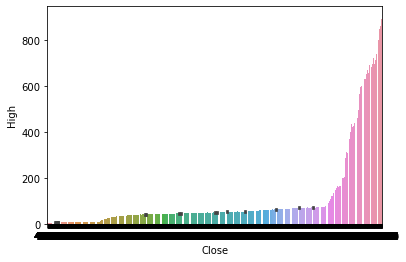

In [82]:
sns.barplot(x=data['Close'],y=data['High'])

<AxesSubplot:xlabel='Close', ylabel='Low'>

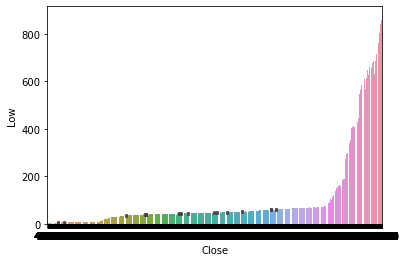

In [83]:
sns.barplot(x=data['Close'],y=data['Low'])

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anupa\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anupa\Anaconda\lib\site-p

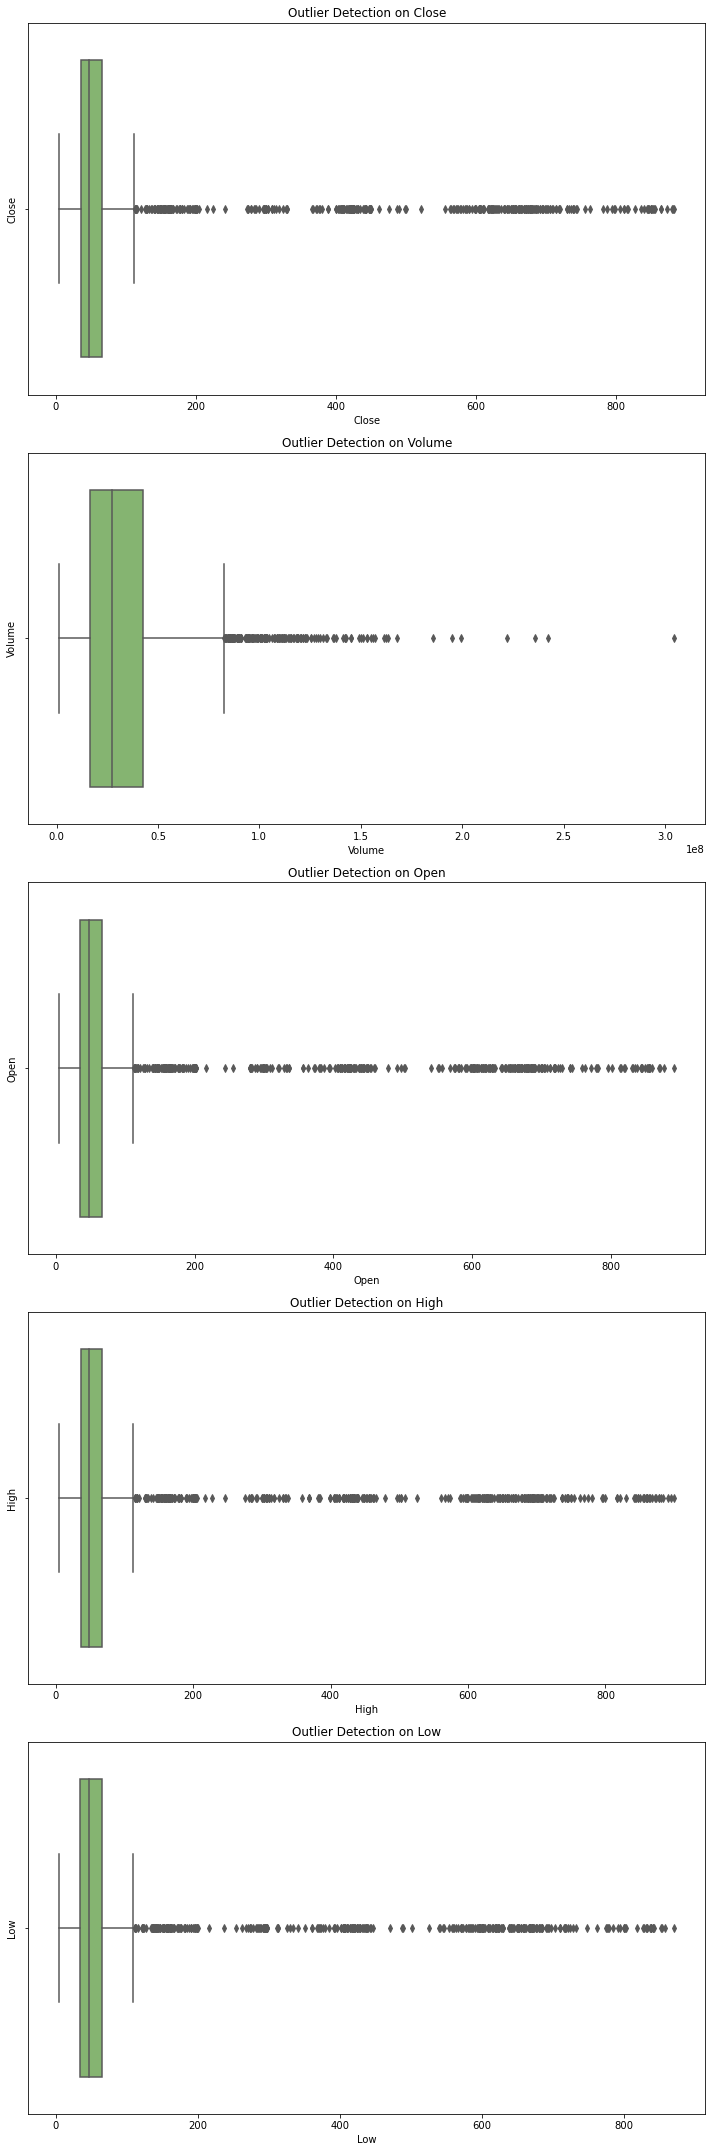

In [32]:
# Visualing and Removing Outliers
fig, ax = plt.subplots(len(columns), figsize=(10, 30))
for i, col in enumerate(columns):
    sns.boxplot(data[col], ax=ax[i], palette='summer', orient='h')
    ax[i].set_title('Outlier Detection on ' + col)
    ax[i].set_ylabel(col)
    fig.tight_layout(pad=1.1)

In [33]:
statistics = data.describe()
statistics = statistics.T
statistics

,count,mean,std,min,25%,50%,75%,max
Close,2516.0,1.017257e+02,1.726759e+02,4.390,3.557500e+01,4.771200e+01,6.619450e+01,8.830900e+02
Volume,2516.0,3.425519e+07,2.880611e+07,1197975.000,1.632291e+07,2.747127e+07,4.281434e+07,3.046938e+08
Open,2516.0,1.016929e+02,1.726673e+02,4.386,3.540450e+01,4.752300e+01,6.602250e+01,8.913800e+02
High,2516.0,1.040224e+02,1.770186e+02,4.622,3.620650e+01,4.857200e+01,6.727463e+01,9.004000e+02
Low,2516.0,9.930664e+01,1.682987e+02,4.300,3.460215e+01,4.685810e+01,6.497300e+01,8.716000e+02


In [34]:
data.shape

(2516, 7)

In [35]:
statistics['IQR'] = statistics['75%'] - statistics['25%']

data = data[(np.abs(stats.zscore(data[['Close', 'Volume', 'Open', 'High', 'Low']])) < 3).all(axis=1)]
data = data.reset_index()
data.head()

,index,Date,Close,Volume,Open,High,Low,date_parsed
0,23,2021-06-17,616.60,22701350,601.888,621.47,601.34,2021-06-17
1,24,2021-06-16,604.87,22144130,597.535,608.50,593.50,2021-06-16
2,25,2021-06-15,599.36,17764150,616.690,616.79,598.23,2021-06-15
3,27,2021-06-11,609.89,16205300,610.230,612.56,601.52,2021-06-11
4,28,2021-06-10,610.12,23919610,603.880,616.59,600.50,2021-06-10


In [36]:
data.shape

(2342, 8)

In [37]:
data

,index,Date,Close,Volume,Open,High,Low,date_parsed
0,23,2021-06-17,616.600,22701350,601.888,621.470,601.3400,2021-06-17
1,24,2021-06-16,604.870,22144130,597.535,608.500,593.5000,2021-06-16
2,25,2021-06-15,599.360,17764150,616.690,616.790,598.2300,2021-06-15
3,27,2021-06-11,609.890,16205300,610.230,612.560,601.5200,2021-06-11
4,28,2021-06-10,610.120,23919610,603.880,616.590,600.5000,2021-06-10
...,...,...,...,...,...,...,...,...
2337,2511,2011-07-28,5.634,4693145,5.520,5.710,5.5080,2011-07-28
2338,2512,2011-07-27,5.528,4792015,5.700,5.700,5.5020,2011-07-27
2339,2513,2011-07-26,5.600,3802660,5.662,5.754,5.5940,2011-07-26
2340,2514,2011-07-25,5.698,3366455,5.802,5.850,5.6880,2011-07-25


In [38]:
data = data.drop('index', axis = 1)
data = data.drop('date_parsed',axis = 1)
data

,Date,Close,Volume,Open,High,Low
0,2021-06-17,616.600,22701350,601.888,621.470,601.3400
1,2021-06-16,604.870,22144130,597.535,608.500,593.5000
2,2021-06-15,599.360,17764150,616.690,616.790,598.2300
3,2021-06-11,609.890,16205300,610.230,612.560,601.5200
4,2021-06-10,610.120,23919610,603.880,616.590,600.5000
...,...,...,...,...,...,...
2337,2011-07-28,5.634,4693145,5.520,5.710,5.5080
2338,2011-07-27,5.528,4792015,5.700,5.700,5.5020
2339,2011-07-26,5.600,3802660,5.662,5.754,5.5940
2340,2011-07-25,5.698,3366455,5.802,5.850,5.6880


<AxesSubplot:xlabel='Close', ylabel='Volume'>

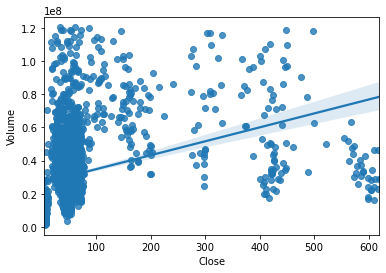

In [91]:
sns.regplot(x=data['Close'],y=data['Volume'])

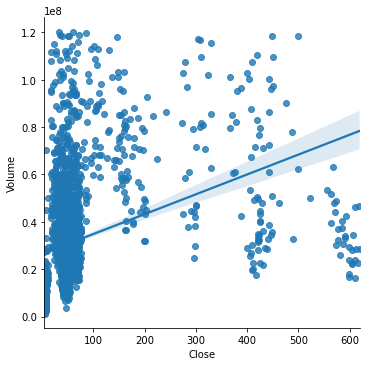

In [92]:
sns.lmplot(x="Close",y="Volume",data=data)

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\anupa\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='Close', ylabel='Volume'>

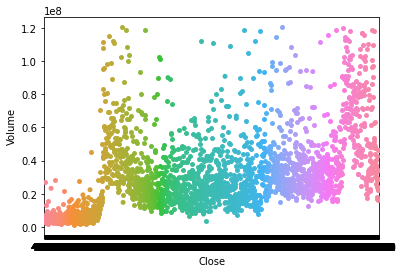

In [94]:
sns.swarmplot(x=data['Close'],y=data['Volume'])

In [95]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [96]:
'''OHLC (open/high/low/close) chart, sense of historical prices. Below OHLC I draw Volume chart which shows number of stocks traded 
each day'''
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Ohlc(x=data.Date,
                      open=data.Open,
                      high=data.High,
                      low=data.Low,
                      close= data.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

### MODELLING

In [39]:
model = []
accuracy = []

In [40]:
X = data[['Volume', 'Open', 'High', 'Low']].values
X

array([[2.270135e+07, 6.018880e+02, 6.214700e+02, 6.013400e+02],
       [2.214413e+07, 5.975350e+02, 6.085000e+02, 5.935000e+02],
       [1.776415e+07, 6.166900e+02, 6.167900e+02, 5.982300e+02],
       ...,
       [3.802660e+06, 5.662000e+00, 5.754000e+00, 5.594000e+00],
       [3.366455e+06, 5.802000e+00, 5.850000e+00, 5.688000e+00],
       [2.917340e+06, 5.740000e+00, 5.908000e+00, 5.710200e+00]])

In [41]:
y = data['Close'].values
y

array([616.6  , 604.87 , 599.36 , ...,   5.6  ,   5.698,   5.858])

<AxesSubplot:>

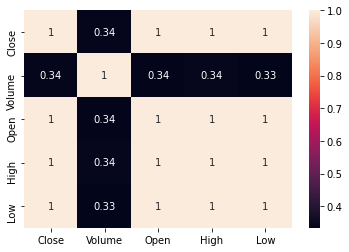

In [42]:
corelation = data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

### _LINEAR REGRESSION_

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
print(regressor.coef_)
print(regressor.intercept_)

[-6.81550697e-10 -5.01871642e-01  9.07252260e-01  5.88764163e-01]
0.0633087840389237


In [105]:
predicted = regressor.predict(X_test)
predicted

array([ 49.71012049,  62.9341372 ,  83.01450882,   6.70793026,
        34.17128361,  52.12660624,  44.68053388,  27.14462785,
         5.24181156,  40.22032084,  24.50649618,  52.98963521,
        49.03974899,  37.77714723,  62.47670129,  71.82813804,
        57.46261337,  39.80466523,  46.77353833,  65.32745292,
        62.42810576,  41.97010078,  52.38045201,  54.45378104,
       106.51443625,   6.87092239,  40.35510308,  50.35733272,
         5.73201753,  46.66508805,  43.07537513,   5.95594585,
       421.78649617,  52.95738372,  63.94953135,  38.41573319,
        40.71110614,  60.29124238,  66.12555312,  38.23682261,
       298.60688485,   6.49474079,   4.98267707,  51.0704748 ,
       147.24984886, 433.91937652,  43.71623203,  44.02281764,
        55.99551968,  72.66011512,  39.32243564,  37.6657643 ,
        69.19841684,  58.43548719, 158.65557691,   5.79265483,
        63.51960457,  29.92984468,  52.22227781,  71.97955101,
         6.31046532,  18.10942614,   6.16670098,  70.61

In [109]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,50.006,49.710120
1,62.712,62.934137
2,82.940,83.014509
3,6.728,6.707930
4,34.194,34.171284
5,52.450,52.126606
6,45.000,44.680534
7,27.090,27.144628
8,5.220,5.241812
9,40.510,40.220321


In [110]:
import math
print('MEAN ABSOLUTE ERROR :', metrics.mean_absolute_error(y_test,predicted))
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(y_test,predicted))
print('ROOT MEAN SQUARED ERROR:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

NameError: name 'metrics' is not defined

<AxesSubplot:>

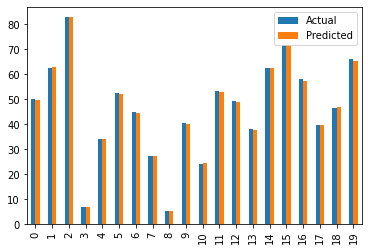

In [111]:
graph = data1.head(20)
graph.plot(kind='bar')

### DECISION TREE REGRESSION

In [112]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [113]:
predicted2 = DT.predict(X_test)
predicted2

array([ 49.412 ,  62.204 ,  86.052 ,   6.54  ,  33.212 ,  51.856 ,
        44.702 ,  28.32  ,   5.362 ,  39.994 ,  25.388 ,  53.256 ,
        51.006 ,  37.032 ,  63.072 ,  71.08  ,  56.672 ,  40.018 ,
        46.542 ,  65.234 ,  63.146 ,  41.534 ,  52.276 ,  54.462 ,
       105.632 ,   6.882 ,  39.874 ,  50.16  ,   5.65  ,  46.684 ,
        43.322 ,   5.742 , 420.98  ,  52.56  ,  64.252 ,  38.748 ,
        40.342 ,  60.288 ,  65.326 ,  38.068 , 286.152 ,   6.43  ,
         4.8   ,  50.708 , 140.696 , 434.    ,  44.386 ,  43.128 ,
        55.364 ,  72.322 ,  39.064 ,  38.032 ,  69.768 ,  55.836 ,
       160.006 ,   5.508 ,  63.076 ,  30.492 ,  52.56  ,  71.904 ,
         6.368 ,  18.3   ,   5.968 ,  70.51  ,  67.404 ,   5.616 ,
       154.876 ,  63.218 ,  24.1   ,  41.268 ,  47.108 ,  58.048 ,
        65.418 ,  64.328 ,  65.64  ,  45.698 ,   6.88  ,  60.598 ,
         6.728 ,  45.672 ,   4.8   ,  42.986 ,   6.266 ,  44.648 ,
        43.858 ,  51.918 ,  44.702 , 192.17  ,   5.65  , 372.7

In [114]:
data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted2.flatten()})
data2.head(20)

,Actual,Predicted
0,50.006,49.412
1,62.712,62.204
2,82.940,86.052
3,6.728,6.540
4,34.194,33.212
5,52.450,51.856
6,45.000,44.702
7,27.090,28.320
8,5.220,5.362
9,40.510,39.994


In [115]:
import math
print('MEAN ABSOLUTE ERROR :', metrics.mean_absolute_error(y_test,predicted2))
print('MEAN SQUARED ERROR:', metrics.mean_squared_error(y_test,predicted2))
print('ROOT MEAN SQUARED ERROR:', math.sqrt(metrics.mean_squared_error(y_test,predicted2)))

NameError: name 'metrics' is not defined

<AxesSubplot:>

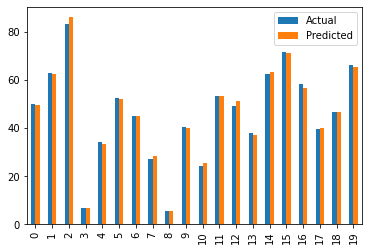

In [116]:
graph = data2.head(20)
graph.plot(kind='bar')

### K-NEAREST NEIGHBOURS

### LOGISTIC REGRESSION

### RANDOM FOREST REGRESSOR

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

NameError: name 'train_X' is not defined